In [1]:
import pandas as pd
import numpy as np
from glob import glob
from joblib import load,dump
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
import joblib
import pickle
joblib.__version__
# import utils
# import krein_functions

'1.1.1'

In [6]:
name_models = ['ANN1',
               'ANN2',
#                'Hybrid',
            #    'HybridKrein_RELU_BN',
            #    'HybridKrein_FalseTrainable',
            #    'HybridKrein',
            #    'HybridKrein_RELU_BN_Hinge',
            #    'HybridKrein_RELU_BN_Hinge_mass',
            #    'HybridKrein_Relu_BN_Cross_mass'
                ]

paths = ['australian',
         'balance',
         'monk-2',
         'sonar',
         'Digit-MultiF1',
         'Digit-MultiF2',
         'madelon',
         'CNAE-9',
         'titanic'
         ]


In [7]:
list_joblibs = glob('{}/{}/*.joblib'.format(name_models[0],paths[0]))
dicts = []
for path_joblib in list_joblibs:
    dicts.append( load(path_joblib) )
result_dict = dicts[0]
if len(dicts)>1:
    for dict_i in dicts[0:]:
        
        result_dict.update(dict_i)


# results

In [8]:
metrics = ['Acc',
           'GM',
           'F1',
           'Acc_score']
dfs_lists = []
per_metric = [None]*len(metrics)
name_columns_model = []
for name in name_models:
    name_columns_model.append(name+'_mean')
    name_columns_model.append(name+'_std')
matrix = []
for i,name in tqdm(enumerate(name_models)):
    col_mean = [] 
    col_std = []
    name_dataset = []
    for path in paths:
        
        list_joblibs = glob('{}/{}/*.joblib'.format(name,path))
        dicts = []
        for path_joblib in list_joblibs:
            dicts.append( load(path_joblib) )
        # print(path)
        result_dict = dicts[0]
        for metric in metrics:
            if type(result_dict['metrics'][metric]) != list:
                result_dict['metrics'][metric] = [float(result_dict['metrics'][metric])]
        for dict_i in dicts[1:]:
            for metric in metrics:
                result_dict['metrics'][metric].append(dict_i['metrics'][metric])

        name_dataset += [path]*len(metrics)
        # print('{}:\n\t {}'.format(name_dataset,result_dict))
        
        
        means = []
        stds = []
        for metric in metrics:
            
            measures = np.array(result_dict['metrics'][metric])
            # print(measures.shape)
            means.append(measures.mean(axis=0))
            stds.append(measures.std(axis=0))
        
        for m,s in zip(means,stds):
            col_mean.append(m)
            col_std.append(s)
    matrix = np.array([col_mean,col_std]).T

    df = pd.DataFrame(matrix,
                    columns=name_columns_model[2*i:2*i+2],
                    index=[name_dataset,metrics*len(paths)])
    dfs_lists.append(df)

df = pd.concat(dfs_lists,axis=1)
df

2it [00:08,  4.03s/it]


ANN1_mean  ANN1_std  ANN2_mean  ANN2_std
australian    Acc         0.866304  0.016137   0.858696  0.012045
              GM          0.865622  0.016219   0.857858  0.012167
              F1          0.862206  0.016348   0.854449  0.012233
              Acc_score   0.862802  0.016340   0.855072  0.012221
balance       Acc         0.657555  0.023038   0.628949  0.005156
              GM          0.262003  0.152543   0.000000  0.000000
              F1          0.656185  0.038018   0.603286  0.004403
              Acc_score   0.867021  0.005827   0.868085  0.007057
monk-2        Acc         0.786196  0.025096   0.788406  0.039667
              GM          0.785572  0.024494   0.787648  0.038942
              F1          0.785491  0.025206   0.787194  0.039099
              Acc_score   0.786154  0.025466   0.787692  0.039102
sonar         Acc         0.758215  0.035073   0.727688  0.029740
              GM          0.757535  0.034515   0.725474  0.029465
              F1          0.757460  0.035099   0.727429  0.029762
              Acc_score   0.758730  0.035351   0.730159  0.030117
Digit-MultiF1 Acc         0.942333  0.012046   0.934333  0.006549
              GM          0.741262  0.048722   0.709233  0.025189
              F1          0.942367  0.012207   0.934420  0.006521
              Acc_score   0.942333  0.012046   0.934333  0.006549
Digit-MultiF2 Acc         0.965667  0.002261   0.967333  0.004546
              GM          0.837895  0.010668   0.845525  0.020154
              F1          0.965720  0.002329   0.967300  0.004546
              Acc_score   0.965667  0.002261   0.967333  0.004546
madelon       Acc         0.554359  0.012887   0.554872  0.016164
              GM          0.554085  0.012805   0.554739  0.016146
              F1          0.554224  0.012847   0.554806  0.016156
              Acc_score   0.554359  0.012887   0.554872  0.016164
CNAE-9        Acc         0.916049  0.013995   0.909877  0.011449
              GM          0.666956  0.046280   0.643522  0.037338
              F1          0.916320  0.013977   0.909789  0.011156
              Acc_score   0.916049  0.013995   0.909877  0.011449
titanic       Acc         0.702901  0.009367   0.700649  0.014139
              GM          0.670823  0.015081   0.665805  0.018610
              F1          0.717378  0.008620   0.715920  0.015010
              Acc_score   0.776399  0.005530   0.777307  0.010367

In [9]:
df.to_excel('./results_ANNs_bayes_framework.xlsx')

In [21]:
name,path

('ANN1', 'Australian')

In [14]:
f =  './Results.joblib'
mdict = {'per_metric':per_metric,
            'metrics':metrics,
            'paths':paths}
dump(mdict,f)


['./Results.joblib']

## Plots

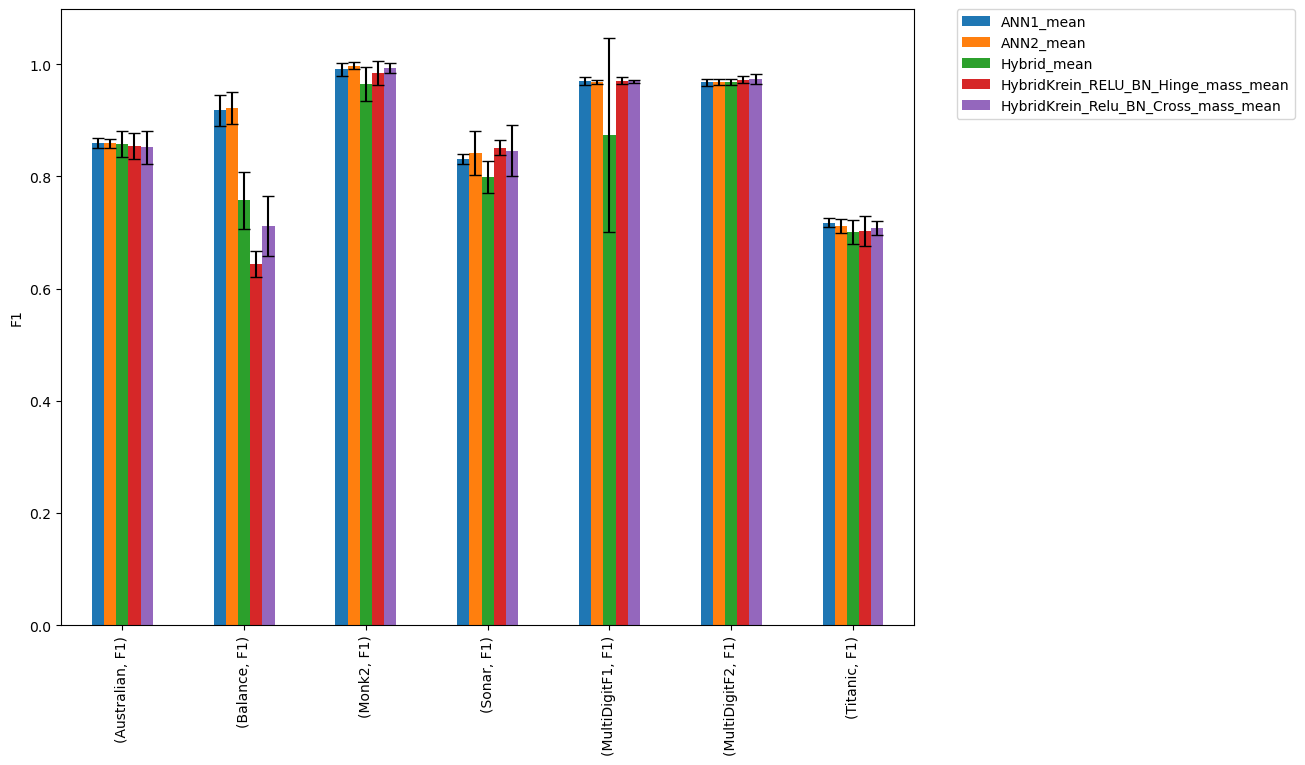

In [15]:
measure = 'F1'
name_columns_model_mean = [name for name in name_columns_model if 'mean'in name]
name_columns_model_std = [name for name in name_columns_model if 'std'in name]


df_mean = df.loc[[(path,measure) for path in paths]][name_columns_model_mean]
df_std = df.loc[[(path,measure) for path in paths]][name_columns_model_std]
df_std.columns = name_columns_model_mean

fig, ax = plt.subplots()
fig.set_size_inches(11,8)
df_mean.plot.bar(yerr=df_std, ax = ax,capsize=4, rot=90)
ax.set_ylabel(measure)
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

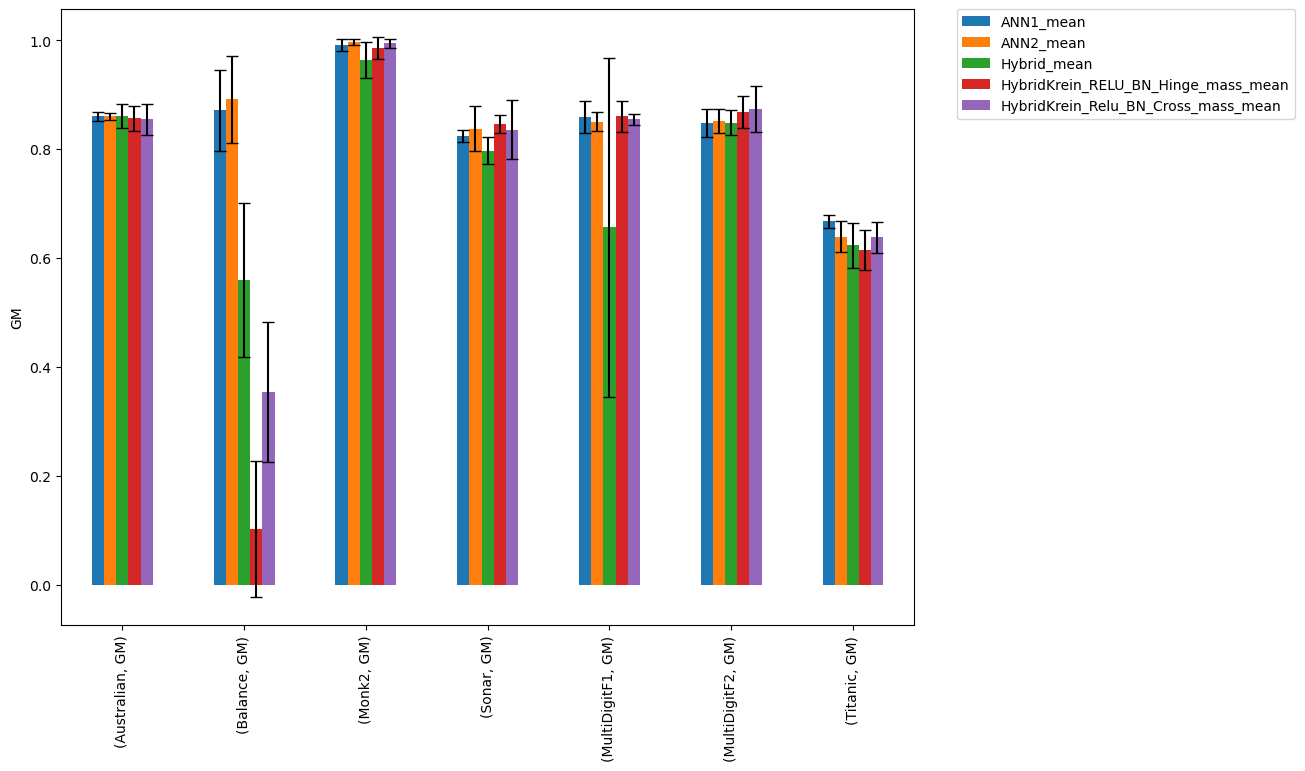

In [16]:
measure = 'GM'
name_columns_model_mean = [name for name in name_columns_model if 'mean'in name]
name_columns_model_std = [name for name in name_columns_model if 'std'in name]


df_mean = df.loc[[(path,measure) for path in paths]][name_columns_model_mean]
df_std = df.loc[[(path,measure) for path in paths]][name_columns_model_std]
df_std.columns = name_columns_model_mean

fig, ax = plt.subplots()
fig.set_size_inches(11,8)
df_mean.plot.bar(yerr=df_std, ax = ax,capsize=4, rot=90)
ax.set_ylabel(measure)
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

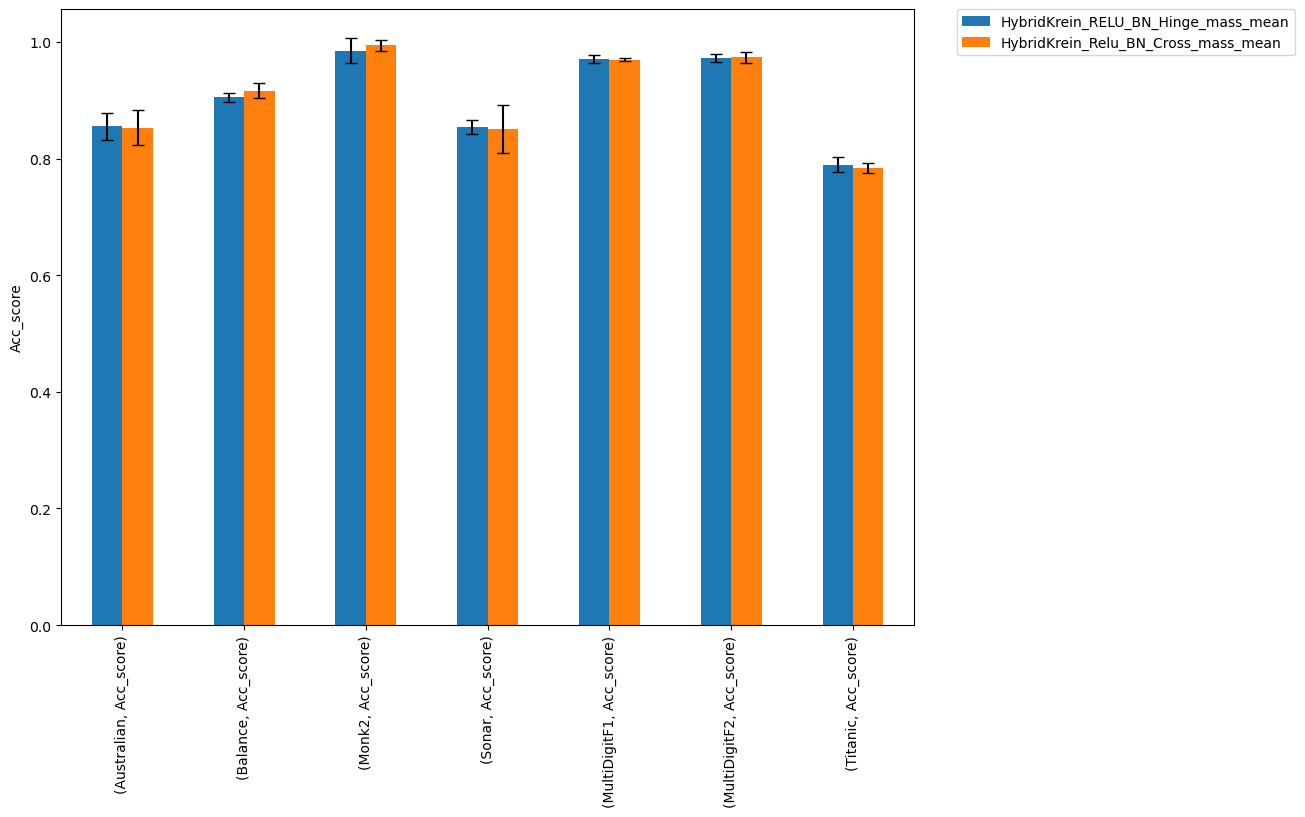

In [25]:
measure = 'Acc_score'
name_columns_model_mean = [name for name in name_columns_model if 'mean'in name]
name_columns_model_std = [name for name in name_columns_model if 'std'in name]


df_mean = df.loc[[(path,measure) for path in paths]][name_columns_model_mean]
df_std = df.loc[[(path,measure) for path in paths]][name_columns_model_std]
df_std.columns = name_columns_model_mean

fig, ax = plt.subplots()
fig.set_size_inches(11,8)
df_mean.plot.bar(yerr=df_std, ax = ax,capsize=4, rot=90)
ax.set_ylabel(measure)
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

## Test stadistic

In [7]:
from scipy.stats import friedmanchisquare
print('{:#^30}'.format(' Friedman test '))
for xx,metric in zip(per_metric,metric):
    chi_square,p = friedmanchisquare(xx[:,0],xx[:,1])
    print('$$X^2$$: {}  ---  p: {}'.format(chi_square,p))

####### Friedman test ########


ValueError: At least 3 sets of measurements must be given for Friedman test, got 2.

In [ ]:
from scipy.stats import friedmanchisquare,ttest_rel,ttest_ind
print('{:#^30}'.format(' Independ ttest '))
for xx,metric in zip(per_metric,metrics):
    tStat,p = ttest_ind(xx[:,0],xx[:,1])
    print('{}\ntStat: {}  ---  p: {}'.format(metric,tStat,p))

####### Independ ttest #######
Sen
tStat: -0.6789294667947033  ---  p: 0.4986349072242322
Spe
tStat: -0.6263370115382942  ---  p: 0.5324155166112041
GM
tStat: -0.9610128917092241  ---  p: 0.3386923394027791
Acc
tStat: -0.8425708830139825  ---  p: 0.4013305500356501
F1
tStat: -0.739536264110285  ---  p: 0.4611858629408574


In [21]:
print('{:#^30}'.format(' Paired ttest '))
for xx,metric in zip(per_metric,metrics):
    tStat,p = ttest_rel(xx[:,0],xx[:,1])
    print('{}\ntStat: {}  ---  p: {}'.format(metric,tStat,p))

######## Paired ttest ########
Sen
tStat: -1.93342637342049  ---  p: 0.05843322719492638
Spe
tStat: -1.6296502169719673  ---  p: 0.10899573570432752
GM
tStat: -2.952234229717914  ---  p: 0.004661343379447896
Acc
tStat: -2.5324538697355674  ---  p: 0.014266552629309837
F1
tStat: -2.2322718968389608  ---  p: 0.029766028467445024
